<a href="https://colab.research.google.com/github/mansi05-t/Decodr/blob/master/Aviation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AVIATION ACCIDENT ANALYSIS**

This project is meant to explore, analyse and visualize aviation accidents and related factors such as reasons, survival rates, fatalities, locations etc. 

Further, the following factors are needed to be analysed:

  1. The planes crashed per year.

  2. People aboard per year during crashes.

  3. People dead per year during crashes.
  
  4. People survived per year during crashes.

  

In [ ]:
# Importing the libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta, datetime
import os


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/mansi05-t/Data-Science/master/Aviation%20Accident%20Analysis/Dataset1.csv')


In [ ]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,1908-09-17,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1912-07-12,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,1913-08-06,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,1913-09-09,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,1913-10-17,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


# Data Set Characteristics:

**This dataset includes:**

    -All civil and commercial aviation accidents of scheduled and non-scheduled passenger airliners worldwide, which resulted in a fatality 
    (including all U.S. Part 121 and Part 135 fatal accidents).
  
    -All cargo, positioning, ferry and test flight fatal accidents.
    
    -All military transport accidents with 10 or more fatalities.
    
    -All commercial and military helicopter accidents with greater than 10 fatalities.
    
    -All civil and military airship accidents involving fatalities.
    
    -Aviation accidents involving the death of famous people.
    
    -Aviation accidents or incidents of noteworthy interest.

**Attribute Information:**

    -Date:      Date of accident, in the format - January 01, 2001

    -Time:      Local time, in 24 hr. format unless otherwise specified

    -Location:  Location of the accident

    -Operator:  Airline or operator of the aircraft

    -Flight:    #Flight number assigned by the aircraft operator

    -Route:     Complete or partial route flown prior to the accident

    -Type:      Aircraft type

    -Registration:  ICAO registration of the aircraft

    -cn/In:     Construction or serial number / Line or fuselage number

    -Aboard:    Total aboard (passengers / crew)

    -Fatalities:  Total fatalities aboard (passengers / crew)

    -Ground:    Total killed on the ground

    -Summary:   Brief description of the accident and cause if known


In [ ]:
df.shape

(5268, 13)

Our dataset has 5268 rows and 13 columns.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          5268 non-null   datetime64[ns]
 1   Time          3049 non-null   object        
 2   Location      5248 non-null   object        
 3   Operator      5250 non-null   object        
 4   Flight #      1069 non-null   object        
 5   Route         3562 non-null   object        
 6   Type          5241 non-null   object        
 7   Registration  4933 non-null   object        
 8   cn/In         4040 non-null   object        
 9   Aboard        5246 non-null   float64       
 10  Fatalities    5256 non-null   float64       
 11  Ground        5246 non-null   float64       
 12  Summary       4878 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 535.2+ KB


In [ ]:
100 * df.isnull().sum()/len(df)

Date             0.000000
Time            42.122248
Location         0.379651
Operator         0.341686
Flight #        79.707669
Route           32.384207
Type             0.512528
Registration     6.359150
cn/In           23.310554
Aboard           0.417616
Fatalities       0.227790
Ground           0.417616
Summary          7.403189
dtype: float64

From the previous cells, we can see that there are more columns that we actually need for this project. Additionally, we can see that several columns have a high percentage of missing values. The columns with many missing values and/or irrelevant to this project are:

Time - High percentage of missing values

Flight # - High percentage of missing values

Route - High percentage of missing values

Registration - High percentage of missing values

cn/In - High percentage of missing values

In [ ]:
df1 = df.drop(['Time', 'Registration', 'cn/In', 'Flight #','Route'], axis=1)
df1["Survival_Rate"] = 100 * (df1["Aboard"] - df1["Fatalities"]) / df1["Aboard"]

In [ ]:
df1["Date"] = pd.to_datetime(df1["Date"])
df1['Day'] = df1['Date'].map(lambda x: x.day)
df1['Year'] = df1['Date'].map(lambda x: x.year)
df1['Month'] = df1['Date'].map(lambda x: x.month)

In [ ]:
df1.head()

,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Survival_Rate,Day,Year,Month
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",50.0,17,1908,9
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,0.0,12,1912,7
2,1913-08-06,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,0.0,6,1913,8
3,1913-09-09,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,30.0,9,1913,9
4,1913-10-17,"Near Johannisthal, Germany",Military - German Navy,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,0.0,17,1913,10


In [ ]:
df1 = df1.query('Aboard != "0.0"')
df1.describe(include='all').T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
Date,5244,4731,1988-08-31 00:00:00,4,1908-09-17,2009-06-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5244,4288,0,19,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Operator,5244,2475,Aeroflot,179,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,5244,2438,Douglas DC-3,332,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Aboard,5244,NaN,NaN,NaN,NaT,NaT,27.565,43.0816,1,5,13,30,644
Fatalities,5244,NaN,NaN,NaN,NaT,NaT,20.0912,33.2155,0,3,9,23,583
Ground,5244,NaN,NaN,NaN,NaT,NaT,1.59439,53.9935,0,0,0,0,2750
Summary,5244,4660,0,383,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Survival_Rate,5244,NaN,NaN,NaN,NaT,NaT,16.5068,29.8771,0,0,0,20,100
Day,5244,NaN,NaN,NaN,NaT,NaT,15.7374,8.80002,1,8,16,23,31


Maximum no. of people who died in a single plane crash is 583.

"Aeroflot" was the most used operator during those years.

"Douglas DC-3" was the most common type.

# Univariate analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef337a5fd0>,
      dtype=object)

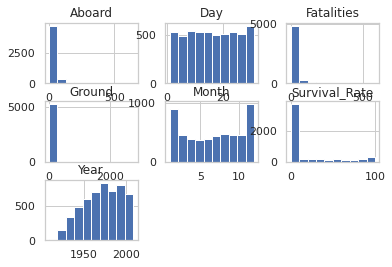

In [ ]:
df1.hist()

# Bivariate

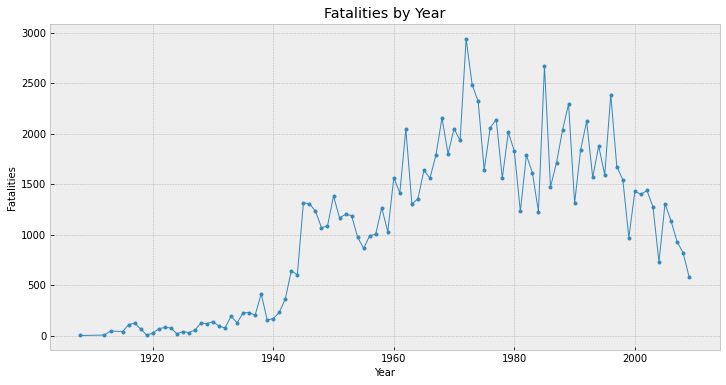

In [ ]:
yearly = df1[['Year','Fatalities']].groupby('Year').agg(['sum','count'])
plt.style.use('bmh')
plt.figure(figsize=(12,6))
yearly['Fatalities','sum'].plot(title='Fatalities by Year',marker = ".", linewidth=1)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Fatalities', fontsize=10)
plt.show()

Now, we will check if Seasons has any impact on the crashes:

In [ ]:
def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'

df1['Season'] = df1['Month'].apply(get_season)

In [ ]:
from collections import Counter

crashes_per_season = Counter(df1['Season'])  
seasons = list(crashes_per_season.keys())
crashes_season = list(crashes_per_season.values())

crashes_per_year = Counter(df1['Year'])
years = list(crashes_per_year.keys())
crashes_year = list(crashes_per_year.values())

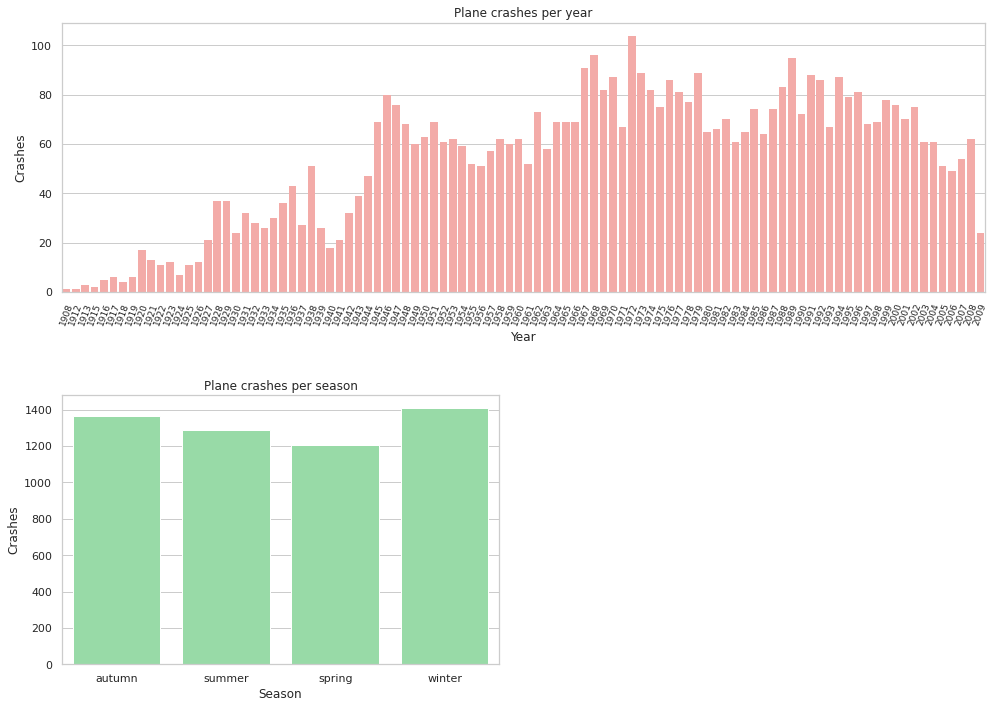

In [ ]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

fig = plt.figure(figsize=(14, 10))

sub1 = fig.add_subplot(211)
sns.barplot(x=years, y=crashes_year, color='r', ax=sub1)
sub1.set(ylabel="Crashes", xlabel="Year", title="Plane crashes per year")
plt.setp(sub1.patches, linewidth=0)
plt.setp(sub1.get_xticklabels(), rotation=70, fontsize=9)

sub3 = fig.add_subplot(223)
sns.barplot(x=seasons, y=crashes_season, color='g', ax=sub3)
texts = sub3.set(ylabel="Crashes", xlabel="Season", title="Plane crashes per season")


plt.tight_layout(w_pad=4, h_pad=3)

The first graph shows that number of crashes is increasing(approximately 1940-1970 years). Since 1970 by now, the number of accidents slowly begins to decrease. It may be because of the improvement in the quality of civil planes, technology and skill of the pilots. Flying is getting safer.

The 2nd graph looks pretty uniform, that means there isn't any dependence between a number of crashes and seasons.

In [ ]:
df1.replace(np.nan, 0, inplace=True)
df1.isnull().sum()

Date             0
Location         0
Operator         0
Type             0
Aboard           0
Fatalities       0
Ground           0
Summary          0
Survival_Rate    0
Day              0
Year             0
Month            0
dtype: int64

In [ ]:
df1_mean = df1["Survival_Rate"].mean()
df1_mean

16.43163819627289

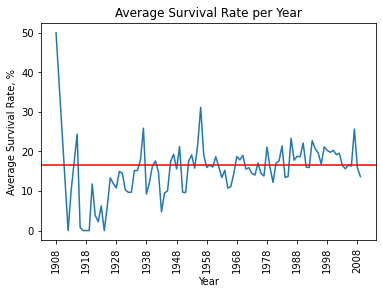

In [ ]:
yearly_survival = df1[["Date","Survival Rate"]].groupby(df1["Date"].dt.year).agg(["mean"])
yearly_survival.plot(legend=None)
plt.ylabel("Average Survival Rate, %")
plt.xlabel("Year")
plt.title("Average Survival Rate per Year")
plt.xticks([x for x in range(1908,2009,10)], rotation='vertical')
plt.axhline(y=df1_mean, color='r', linestyle='-')
plt.show()

The average survival rate was high during the begining years but it was low during the years 1940-1970. Again it started becoming better in the henceforth years.

# Dangerous Operator 

In [ ]:
gp=df1.groupby('Operator').agg({'Fatalities':['sum', lambda  x: x.sum()/df1['Fatalities'].sum()]})

#Flatten the multiindex 
gp.columns=gp.columns.map('_'.join)

#Rename Columns

gp.rename(columns={'Fatalities_sum':'Total Fatalities','Fatalities_<lambda_0>':'% of Total Fatalities'},inplace=True)

#Sort by Total Fatalities
gp.sort_values(by='Total Fatalities', ascending=False).head()

,Total Fatalities,% of Total Fatalities
Operator,,
Aeroflot,7156.0,0.067843
Military - U.S. Air Force,3717.0,0.035239
Air France,1734.0,0.016439
American Airlines,1421.0,0.013472
Pan American World Airways,1302.0,0.012344


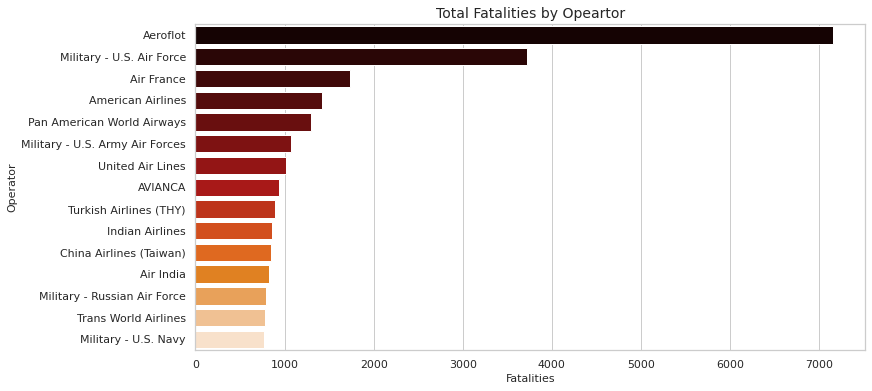

In [ ]:
Prop_by_Op = df1.groupby('Operator')[['Fatalities']].sum()
Prop_by_Op = Prop_by_Op.rename(columns={"Operator": "Fatalities"})
Prop_by_Op = Prop_by_Op.sort_values(by='Fatalities', ascending=False)
Prop_by_OpTOP = Prop_by_Op.head(15)

plt.figure(figsize=(12,6))
sns.barplot(y=Prop_by_OpTOP.index, x="Fatalities", data=Prop_by_OpTOP, palette="gist_heat", orient='h')
plt.xlabel('Fatalities', fontsize=11)
plt.ylabel('Operator', fontsize=11)
plt.title('Total Fatalities by Opeartor', loc='Center', fontsize=14)
plt.show()

Aeroflot is by far the most dangerous operator. People have 68% chances of dying if they flew with Aeroflot than any other operator

In [ ]:
filt=df1['Operator']=='Aeroflot'
aerotype=df1.loc[filt,['Operator','Type','Fatalities']]
aerotype.sort_values(by='Fatalities', ascending=False).head()

,Operator,Type,Fatalities
3564,Aeroflot,Tupolev TU-154B-2,200.0
3510,Aeroflot,Tupolev TU-154B,174.0
2596,Aeroflot,Ilyushin IL-62,174.0
3228,Aeroflot,Tupolev TU-154B,166.0
3342,Aeroflot,Yakovlev YAK-42,132.0


In [ ]:
aerotype.groupby('Type').agg({'Fatalities':'sum'}).sort_values('Fatalities',ascending=False).head()

,Fatalities
Type,
Ilyushin IL-18B,598.0
Tupolev TU-104B,561.0
Tupolev TU-134A,479.0
Tupolev TU-104A,470.0
Yakovlev YAK-40,457.0


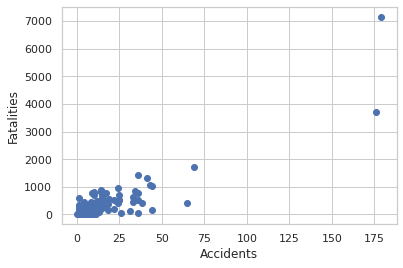

In [ ]:
operator = df1[['Operator','Fatalities']].groupby('Operator').agg(['sum','count'])
X = operator['Fatalities','count']
Y = operator['Fatalities','sum']
plt.scatter(X, Y,label='Operators')
plt.ylabel('Fatalities')
plt.xlabel('Accidents');

Below are the operators with minimum danger.

In [ ]:
Prop_by_Op[(Prop_by_Op['Fatalities']== Prop_by_Op.Fatalities.min())].index.tolist()

['Island Sky Ferry - Air Taxi',
 'Regional Compagnie Aerienne Europeenne',
 'Military - Ejército del Aire',
 'Centurian Air Cargo',
 'Military U.S. Navy',
 'Ararat Avia',
 'Southwest Airlines',
 'Canadian Air Transat',
 'Military - Ukraine Air Force',
 'US Airways',
 'Western Helicopter',
 'American International Airways',
 'Military - U.S. Air Force / Military U.S. Air Force',
 'Hewa Bora Airways']

# Aircraft Type
We will check which Aircraft Type is the most dangerous. 

In [ ]:
gp=df1.groupby('Type').agg({'Fatalities':['sum', lambda  x: x.sum()/df1['Fatalities'].sum()]}) 
gp.columns=gp.columns.map('_'.join)
gp.rename(columns={'Fatalities_sum':'Total Fatalities','Fatalities_<lambda_0>':'% of Total Fatalities'},inplace=True)
gp.sort_values(by='Total Fatalities', ascending=False).head()

,Total Fatalities,% of Total Fatalities
Type,,
Douglas DC-3,4792.0,0.045483
Antonov AN-26,1068.0,0.010137
Douglas DC-6B,1055.0,0.010013
Douglas C-47,1046.0,0.009928
McDonnell Douglas DC-9-32,951.0,0.009026


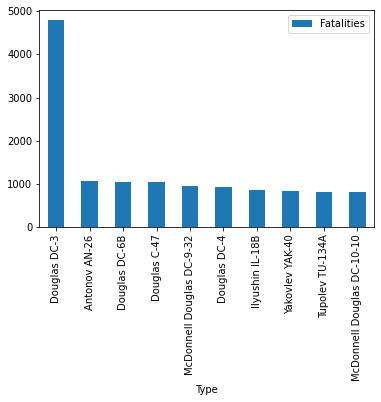

In [ ]:
df1.groupby(['Type']).agg({'Fatalities':'sum'}).sort_values(by=['Fatalities'],ascending=False).head(10).plot.bar()

Douglas DC-3 is atleast 5 times more probable to crash than any other type of aircraft.

Around 45% people had died because of Douglas DC-3.

In [ ]:
filt=df1['Type']=='Douglas DC-3'
doug=df1.loc[filt,['Operator','Fatalities']].sort_values('Fatalities', ascending=False)
doug.head(10)

,Operator,Fatalities
1150,Societe Alpes Provence,39.0
2001,Air Vietnam (South Vietnam),38.0
2197,Royal Air Lao,37.0
2210,Ladeco,36.0
1450,Empresa Aviacion del Pacifico,36.0
2323,Royal Nepal Airlines,35.0
2294,Mineral County Airlines,35.0
3244,Florida Commuter Airlines,34.0
1475,Air France,34.0
1739,Derby Aviation,34.0


Aerofloat is not among top 10 users of Douglas DC-3. So we can conclude that it's not the combination of Aerofloat and Douglas DC-3 that has been fatal.


#**Dangerous Locations to fly**
![picture](https://drive.google.com/uc?id=1O6H7Xanp7Jxbd1B2udqiLsDtr_j4ZwON) 


In [ ]:
loc_list = Counter(df1['Location'].dropna()).most_common(10)
locs = []
crashes = []
for loc in loc_list:
    locs.append(loc[0])
    crashes.append(loc[1])
print('Top 10 the most dangerous locations')
pd.DataFrame({'Crashes in this location' : crashes}, index=locs)

Top 10 the most dangerous locations


,Crashes in this location
"Sao Paulo, Brazil",15
"Moscow, Russia",15
"Rio de Janeiro, Brazil",14
"Bogota, Colombia",13
"Manila, Philippines",13
"Anchorage, Alaska",13
"New York, New York",12
"Cairo, Egypt",12
"Chicago, Illinois",11
"Near Moscow, Russia",9


According to the frequency of Accidents,

*   Brazil is the most dangerous location as the total number of crashes happened are 29 (15 at Sao Paulo + 14 at Rio de Janerio).
*   Rusia is the 2nd most dangerous with 24 (15+9) plane crashes.









In [ ]:
gp=df1.groupby('Location').agg({'Fatalities':['sum',lambda x: x.sum()/df1['Fatalities'].sum()]})
gp.columns=gp.columns.map('_'.join)
gp.rename(columns={'Fatalities_sum':'Total Fatalities', 'Fatalities_<lambda_0>':'% of Total Fatalities'},inplace=True)
gp.sort_values(by='Total Fatalities', ascending=False).head()

,Total Fatalities,% of Total Fatalities
Location,,
"Tenerife, Canary Islands",761.0,0.007223
"Mt. Osutaka, near Ueno Village, Japan",520.0,0.004936
"Moscow, Russia",432.0,0.004100
"Near Moscow, Russia",364.0,0.003455
"Sao Paulo, Brazil",362.0,0.003436


In [ ]:
df1.query('Location=="Tenerife, Canary Islands"')

,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Survival_Rate,Day,Year,Month,Season
2020,1965-12-07,"Tenerife, Canary Islands",Spantax,Douglas DC-3,32.0,32.0,0.0,Crashed into high terrain shortly after takeof...,0.00000,7,1965,12,winter
2963,1977-03-27,"Tenerife, Canary Islands",Pan American World Airways / KLM,Boeing B-747-121 / Boeing B-747-206B,644.0,583.0,0.0,Both aircraft were diverted to Tenerife becaus...,9.47205,27,1977,3,spring
3214,1980-04-25,"Tenerife, Canary Islands",Dan Air Services,Boeing B-727-64,146.0,146.0,0.0,"The plane crashed into a mountain 5,500 ft. hi...",0.00000,25,1980,4,spring


If we look at the total number of Fatalities, 


*   **Russia** is the most dangerous as 796 people had died in 24 different the plane crash.

*   Around 760 people had lost their lives in **Tenerife, Canary Islands** in 3 different crashes.


*   520 people had lost their lives in **Japan**.







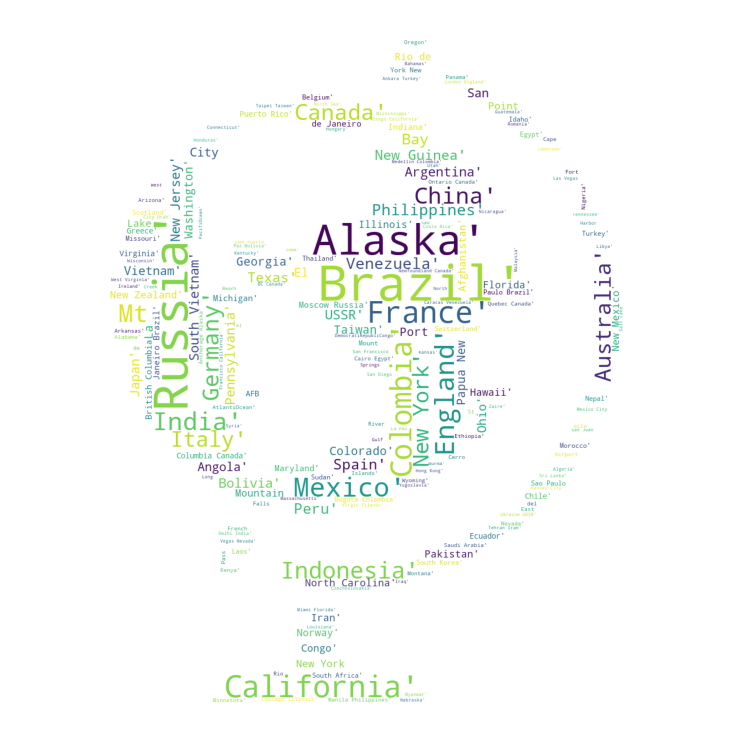

In [ ]:
text = str(df1.Location.tolist())
mask = np.array(Image.open(requests.get('https://previews.123rf.com/images/ahasoft2000/ahasoft20001703/ahasoft2000170301657/74074435-globe-vector-icon.jpg', stream=True).raw))

stopwords = set(STOPWORDS)
newStopword = ['nan', 'near' , 'island']
stopwords.update(newStopword)

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(mask):
    word_cloud = WordCloud( background_color='white', stopwords=stopwords, mask=mask)
    word_cloud.generate(text)
    plt.figure(figsize=(12,10),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(mask)

In [ ]:
df1.query('Location=="New Delhi, India"')

,Date,Location,Operator,Type,Aboard,Fatalities,Ground,Summary,Survival_Rate,Day,Year,Month,Season
1262,1953-05-09,"New Delhi, India",Air India,Douglas DC-3,18.0,18.0,0.0,Stalled following takeoff. An error of judgeme...,0.000000,9,1953,5,spring
1309,1954-02-25,"New Delhi, India",Indian Airlines,Douglas DC-3,3.0,3.0,0.0,The test flight crashed after attempting to de...,0.000000,25,1954,2,winter
1485,1957-05-13,"New Delhi, India",Indian Airlines,Douglas DC-3,2.0,2.0,3.0,During a training exercise the aircraft approa...,0.000000,13,1957,5,spring
1519,1958-05-15,"New Delhi, India",Pakistan International Airlines,Convair CV-240-7,38.0,21.0,2.0,Crashed shortly after taking off. Improper obs...,44.736842,15,1958,5,spring
4232,1994-03-08,"New Delhi, India",Sahara,Boeing 737-2R4C,4.0,4.0,0.0,Crashed during touch-and-go exercises. Applica...,0.000000,8,1994,3,spring
4623,1999-03-07,"New Delhi, India",Military - Indian Air Force,Antonov AN-32 Transport,19.0,19.0,3.0,"While approaching New Delhi Airport, the plane...",0.000000,7,1999,3,spring


If we look at India,

1. Air crashes happened 6 times and around 60 people had lost their lives.
2. **Douglas DC-3** is more susceptible to air crash.




# **Exploring the causes of crashes**


Let's analyse a **"Summary"** column and highlight the main themes that occur in the texts in this column. 


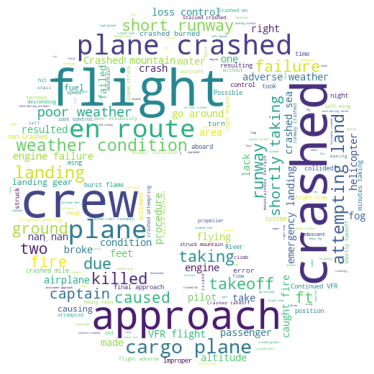

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import urllib
import requests
import numpy as np
import matplotlib.pyplot as plt

text = str(df1.Summary.tolist())
mask = np.array(Image.open(requests.get('https://c7.uihere.com/files/303/182/469/blue-airplane-icon-vector.jpg', stream=True).raw))

stopwords = set(STOPWORDS)
newStopword = ['aircraft', 'pilot', 'en route', 'airport']
stopwords.update(newStopword)

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(mask):
    word_cloud = WordCloud( background_color='white', stopwords=stopwords, mask=mask)
    word_cloud.generate(text)
    plt.figure(figsize=(8,5),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
    
#Run the following to generate your wordcloud
generate_wordcloud(mask)


# **Conclusion**





1. Flying with Aeroflot is not recommended as there is a 68% chance of you dying.

2. Flying with Douglas DC-3 is highly inadvisable because you are 5 times more probable to die and also it had the highest fatalities percentage.

3. Avoid taking flights that fly over the Canary Islands or Russia as it has a high fatality rate.

4. Refrain from visiting  Sao Paulo, Rio de Janeiro, and Moscow as the frequency of plane crashes is the highest over there.

5. It is so much safer to take flight nowadays as compared to 1970-80, 1972 was the worst years for the airline industry.